# Pretrained VGG-19 Net

In [1]:
#!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
#data_dir  = data_dir[:1000]

In [4]:
print(data_dir)

/Users/alokbhardwaj/.keras/datasets/flower_photos


/Users/alokbhardwaj/.keras/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg


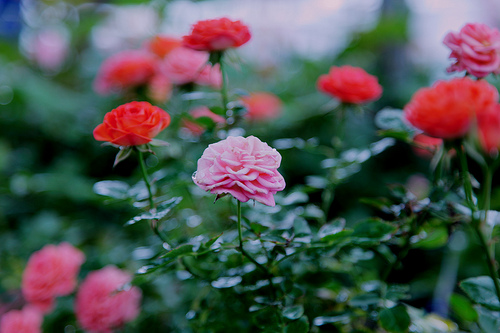

In [6]:
roses = list(data_dir.glob('roses/*'))
print(roses[1])
PIL.Image.open(str(roses[1]))

In [9]:
img_height,img_width=224,224
batch_size=8
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


2024-04-18 11:19:25.990146: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


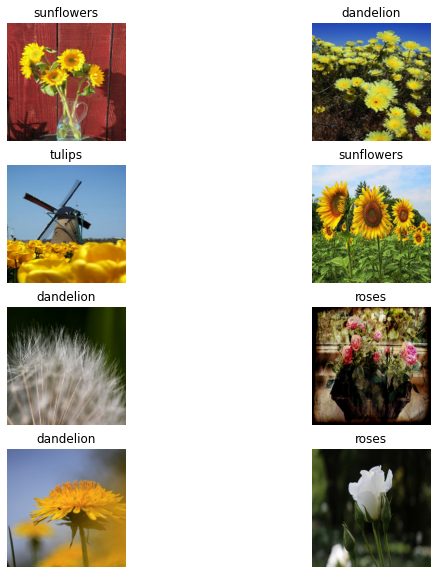

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):# taking only one batch at a time
      for i in range(8):
        ax = plt.subplot(4, 2, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Training The Model
# VGG19 function

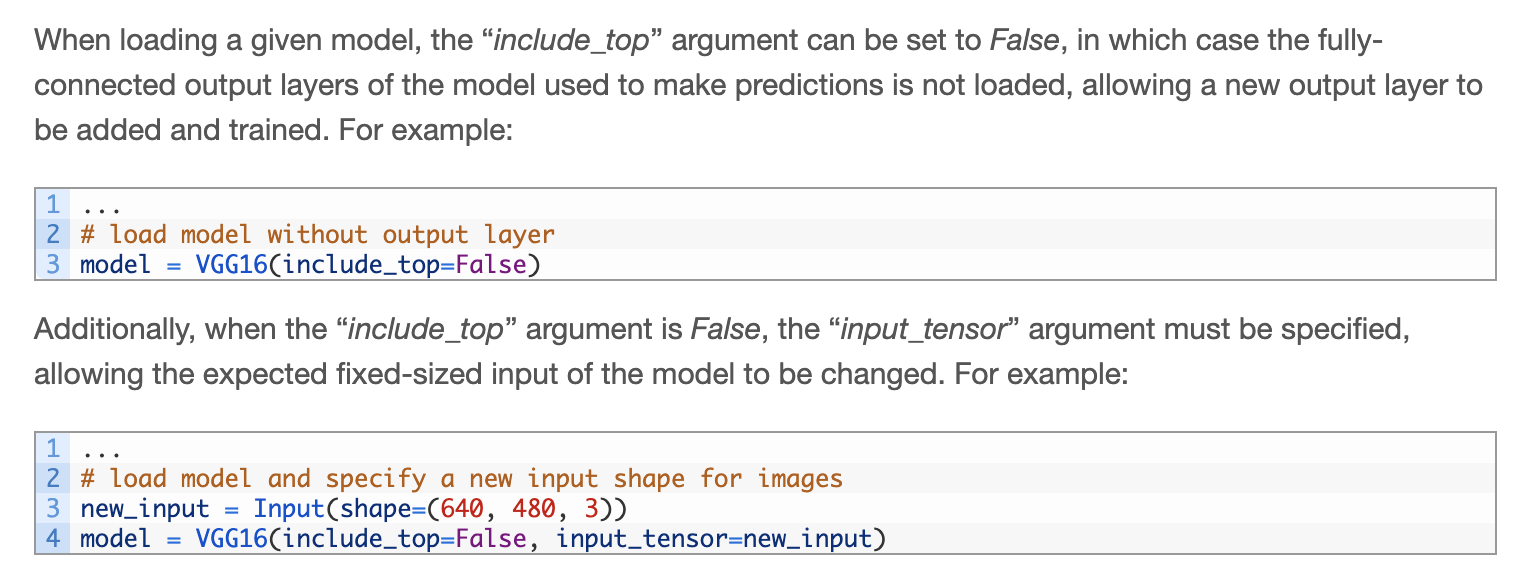

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

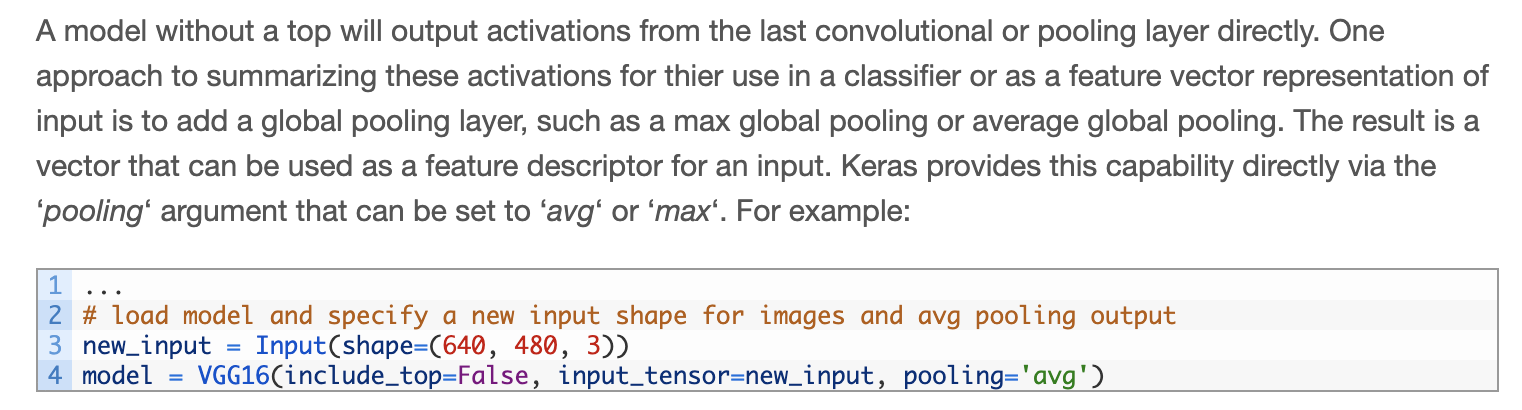

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

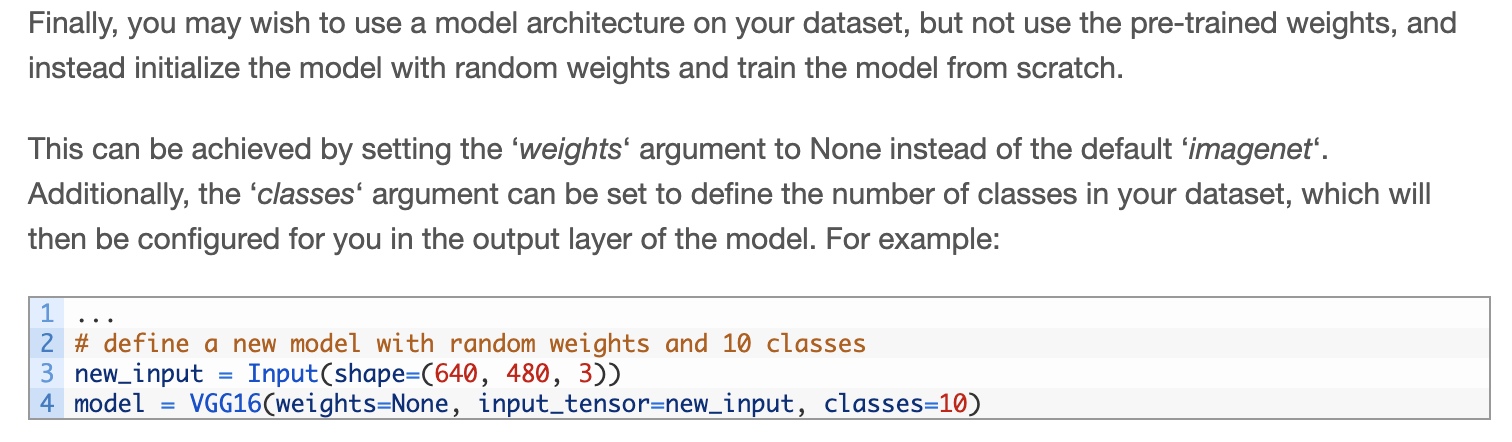

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

In [13]:
VGG19_model = Sequential()

pretrained_model = tf.keras.applications.VGG19(
                    include_top=False,
                    weights="imagenet", # freezing the network
                    # input_tensor=None,
                    input_shape=(224,224,3),
                    pooling='avg',
                    classes=5,
                    classifier_activation="softmax",
)


for layer in pretrained_model.layers:
        layer.trainable=False   # freezing the network


# building the VGG19 Stack
VGG19_model.add(pretrained_model)
VGG19_model.add(Flatten())
VGG19_model.add(Dense(512, activation='relu'))
VGG19_model.add(Dense(5, activation='softmax'))

In [14]:
VGG19_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 20,289,605
Trainable params: 265,221
Non-trainable params: 20,024,384
_________________________________________________________________


In [11]:
#VGG19_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
VGG19_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
epochs=2
history = VGG19_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
 93/367 [======>.......................] - ETA: 4:44 - loss: 2.8846 - accuracy: 0.5551


KeyboardInterrupt



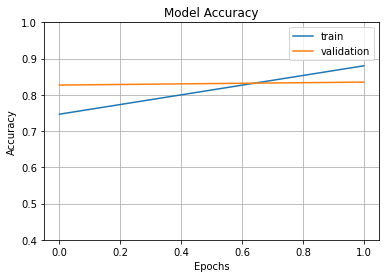

In [58]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

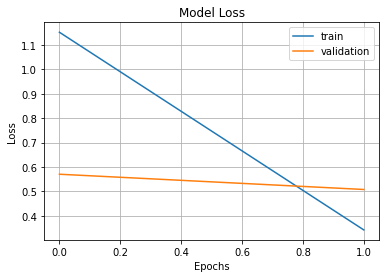

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [60]:
print ([roses[1]])

[PosixPath('/Users/alokbhardwaj/.keras/datasets/flower_photos/dandelion/461632542_0387557eff.jpg')]


In [62]:
import os
os.sys.path

import cv2
image=cv2.imread(str(roses[0]))
print (image.shape)

(240, 320, 3)


In [63]:
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [64]:
pred=VGG19_model.predict(image)
print(pred)

[[5.4622818e-02 9.3763953e-01 1.7932123e-04 6.7480560e-03 8.1024721e-04]]


In [65]:
print (np.argmax(pred))
print (class_names)

1
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [66]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is dandelion
